In [1]:
import torch
from matplotlib import pyplot as plt
import seaborn as sns

## Небольшая вводная

In [2]:
ENCODER_WORDS = 2
DECODER_WORDS = 3
EMBEDDING_DIM = 4

- 2 слова в энкодере
- 3 слова в декодере
- 4 - размер эмбеддинга

In [3]:
encoder_hidden = torch.rand(ENCODER_WORDS, EMBEDDING_DIM)
decoder_hidden = torch.rand(DECODER_WORDS, EMBEDDING_DIM)
decoder_hidden.shape, encoder_hidden.shape

(torch.Size([3, 4]), torch.Size([2, 4]))

In [4]:
encoder_hidden

tensor([[0.6749, 0.1004, 0.2675, 0.1268],
        [0.5108, 0.0814, 0.6243, 0.5729]])

In [5]:
decoder_hidden

tensor([[0.5800, 0.3572, 0.7303, 0.2768],
        [0.0318, 0.7207, 0.3617, 0.4395],
        [0.0010, 0.9457, 0.4492, 0.6747]])

# Скалярное произведение
*dot product, matmul, matrix multiplication*  
Может выступать в качестве меры схожести векторов. Чем больше скалярное произведение двух вектор, тем больше они похожи
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/69f8ac1d2b7ffb9ef70bb6b151a4b931f20087a5)

In [6]:
x1 = torch.Tensor([1, 2, 3])
x2 = torch.Tensor([2, 2, 4])
x3 = torch.Tensor([-2, 2, -4])

print('Скалярное произведение между первым и вторым векторами: {}'.format((x1 * x2).sum().item()))
print('Скалярное произведение между первым и третьим векторами: {}'.format((x1 * x3).sum().item()))
print('Скалярное произведение между вторым и третьим векторами: {}'.format((x2 * x3).sum().item()))
print()
print('Скалярное произведение первого вектора с самим собой: {}'.format((x1 * x1).sum().item()))
print('Скалярное произведение второго вектора с самим собой: {}'.format((x2 * x2).sum().item()))
print('Скалярное произведение третьего вектора с самим собой: {}'.format((x3 * x3).sum().item()))

Скалярное произведение между первым и вторым векторами: 18.0
Скалярное произведение между первым и третьим векторами: -10.0
Скалярное произведение между вторым и третьим векторами: -16.0

Скалярное произведение первого вектора с самим собой: 14.0
Скалярное произведение второго вектора с самим собой: 24.0
Скалярное произведение третьего вектора с самим собой: 24.0


### Косинусное расстояние это просто скалирование (деление) на нормы (расстояние до начала координат) векторов

In [7]:
print('Косинусная близость между первым и вторым векторами: {}'.format((x1 * x2).sum()/(x1.norm()*x2.norm()).item()))
print('Косинусная близость между первым и первым векторами: {}'.format((x1 * x1).sum()/(x1.norm()*x1.norm()).item()))

Косинусная близость между первым и вторым векторами: 0.9819805026054382
Косинусная близость между первым и первым векторами: 0.9999999403953552


### Рассчитаем насколько каждое слово в декодере похоже на каждое слово в энкодере с помощью скалярного умножения векторов (каждый с каждым)

In [8]:
attention_scores = torch.matmul(decoder_hidden, encoder_hidden.t())

In [9]:
attention_scores

tensor([[0.6578, 0.9398],
        [0.2463, 0.5525],
        [0.3014, 0.7444]])

Напомню, что у нас:
- 2 слова в энкодере
- 3 слова в декодере

Text(87,0.5,'Слова декодера')

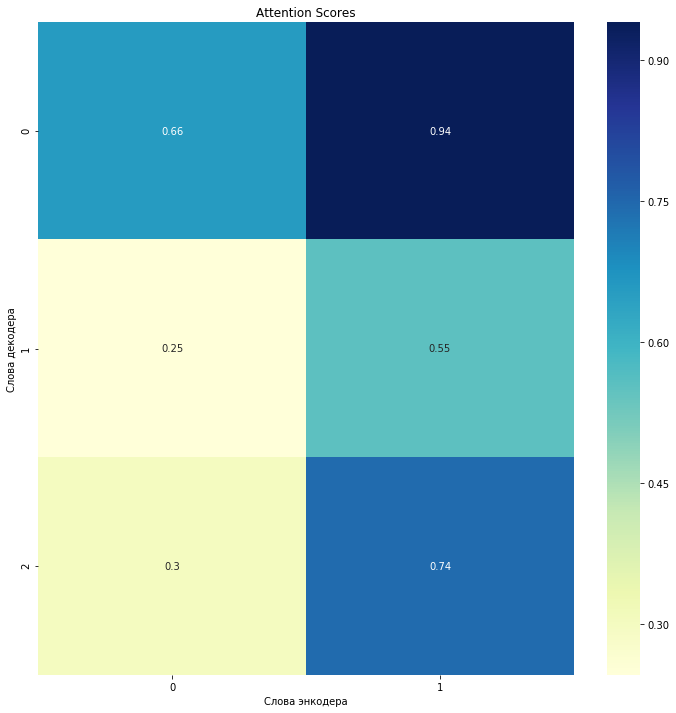

In [10]:
plt.figure(figsize=(12, 12))
plt.title('Attention Scores')
sns.heatmap(attention_scores.numpy(), annot=True, cmap="YlGnBu")
plt.xlabel('Слова энкодера')
plt.ylabel('Слова декодера')

In [11]:
attention_scores.shape

torch.Size([3, 2])

### То есть вектор ниже говорит о том, насколько нулевое слово в декодере похоже на нулевое и первое слово в энкодере

In [12]:
attention_scores[0]

tensor([0.6578, 0.9398])

## Рассчитаем в долях насколько каждое слово в энкодере "важно" для отдельного слова в декодере, то есть по сути его долю, вклад, релеваность
### Для этого нам поможет софтмакс по строкам

In [13]:
attention_distribution = torch.softmax(attention_scores, 1)

In [14]:
attention_distribution

tensor([[0.4300, 0.5700],
        [0.4241, 0.5759],
        [0.3910, 0.6090]])

In [15]:
# в сумме должны получить вектор из единиц размером количество слов в декодере
attention_distribution.sum(1)

tensor([1., 1., 1.])

Text(87,0.5,'Слова декодера')

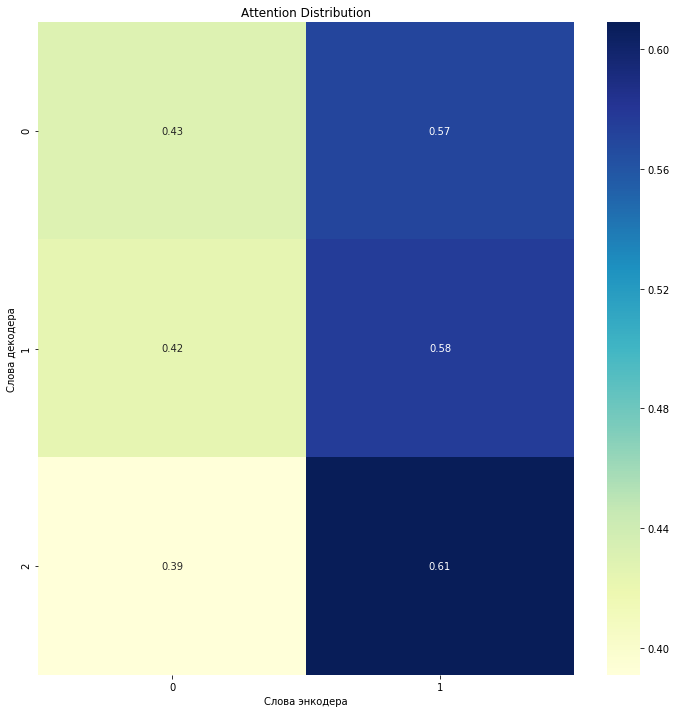

In [16]:
plt.figure(figsize=(12, 12))
plt.title('Attention Distribution')
sns.heatmap(attention_distribution.numpy(), annot=True, cmap="YlGnBu")
plt.xlabel('Слова энкодера')
plt.ylabel('Слова декодера')

## Что это нам говорит

In [17]:
c00 = attention_distribution[0][0].item()
c01 = attention_distribution[0][1].item()

print('Доля памяти нулевого слова энкодера для нулевого слова из декодера: {:.2f} %'.format(c00 * 100))
print('Доля памяти первого слова энкодера для нулевого слова из декодера: {:.2f} %'.format(c01 * 100))

print()

c10 = attention_distribution[1][0].item()
c11 = attention_distribution[1][1].item()

print('Доля памяти нулевого слова энкодера для первого слова из декодера: {:.2f} %'.format(c10 * 100))
print('Доля памяти первого слова энкодера для первого слова из декодера: {:.2f} %'.format(c11 * 100))

Доля памяти нулевого слова энкодера для нулевого слова из декодера: 43.00 %
Доля памяти первого слова энкодера для нулевого слова из декодера: 57.00 %

Доля памяти нулевого слова энкодера для первого слова из декодера: 42.41 %
Доля памяти первого слова энкодера для первого слова из декодера: 57.59 %


### По сути эти цифры говорят насколько сильно для каждого слова декодера нам нужно обратить внимание на каждое слово из энкодера
### Или как вспомнить каждое слово из энкодера в долях, в зависимости насколько оно важно для слова из декодера, то есть

In [18]:
print('Для первого слова декодера нужно вспомнить {:.2f} % нулевого слова энкодера и {:.2f} % первого слова энкодера'.format(
    c10 * 100, c11 * 100))
print('Или')
print('Для первого слова декодера нулевое слова энкодера релевантно на {:.2f} %, а первое слово энкодера на {:.2f} %'.format(
    c10 * 100, c11 * 100))

Для первого слова декодера нужно вспомнить 42.41 % нулевого слова энкодера и 57.59 % первого слова энкодера
Или
Для первого слова декодера нулевое слова энкодера релевантно на 42.41 %, а первое слово энкодера на 57.59 %


### По сути у нас получились веса слов энкодера относительно слов декодера
### Давайте для каждого слова в декодере составим комбинацию векторов слов энкодера с этими весами
### Это называется вектором внимания, то есть мы для каждого слова декодера собираем все предложение из энкодера с весами, которые говорят на какую часть предложения энкодера нужно обратить больше внимания

In [19]:
# наша таблицу с весами
attention_distribution

tensor([[0.4300, 0.5700],
        [0.4241, 0.5759],
        [0.3910, 0.6090]])

In [20]:
# наши вектора слов энкодера
encoder_hidden

tensor([[0.6749, 0.1004, 0.2675, 0.1268],
        [0.5108, 0.0814, 0.6243, 0.5729]])

In [21]:
# наши вектора слов декодера
decoder_hidden

tensor([[0.5800, 0.3572, 0.7303, 0.2768],
        [0.0318, 0.7207, 0.3617, 0.4395],
        [0.0010, 0.9457, 0.4492, 0.6747]])

### Составим вектор внимания для нулевого слова декодера

In [22]:
# веса слов энкодера для нулевого слова декодера
attention_distribution[0]

tensor([0.4300, 0.5700])

In [23]:
# два веса на каждое из слов в энкодере
attention_distribution[0][0], attention_distribution[0][1]

(tensor(0.4300), tensor(0.5700))

In [24]:
# домножим вектор нулевого слова энкодера на его вес (какую долю информации мы хотим взять от этого слова)
attention_distribution[0][0] * encoder_hidden[0]

tensor([0.2902, 0.0432, 0.1150, 0.0545])

In [25]:
# тоже самое для первого слова в энкодере
attention_distribution[0][1] * encoder_hidden[1]

tensor([0.2912, 0.0464, 0.3559, 0.3266])

In [26]:
print('Для нулевого слова декодера нужно вспомнить {:.2f} % нулевого слова энкодера и {:.2f} % первого слова энкодера'.format(
    c00 * 100, c01 * 100))

Для нулевого слова декодера нужно вспомнить 43.00 % нулевого слова энкодера и 57.00 % первого слова энкодера


In [27]:
# теперь давайте эту информацию сложим
# то есть возьмем часть от нулевого слова и часть от первого
# эти части зависят от того насколько для текущего слова декодера нам важные слова энкодера
attn_vec_0 = attention_distribution[0][0] * encoder_hidden[0] + attention_distribution[0][1] * encoder_hidden[1]

In [28]:
# получился вектор внимания нулевого слова декодера относительно слов энкодера
attn_vec_0

tensor([0.5813, 0.0896, 0.4709, 0.3811])

In [29]:
# сделаем тоже самое для остальных слов декодера
# их у нас все еще 3
attn_vec_1 = attention_distribution[1][0] * encoder_hidden[0] + attention_distribution[1][1] * encoder_hidden[1]
attn_vec_2 = attention_distribution[2][0] * encoder_hidden[0] + attention_distribution[2][1] * encoder_hidden[1]

In [30]:
# сделаем массив для векторов внимания, в нем должно быть количество векторов равное количеству слов в декодере
# потому что мы считаем вектора внимания для каждого слова в декодере, а "обращать внимание" будем на слова в энкодере
attention_vectors = [attn_vec_0, attn_vec_1, attn_vec_2]

In [31]:
# теперь давайте переведем массив в матрицу
# добавим в каждый вектор нулевую размерность
# и по этой размерности сконкатенируем
attention_vectors = torch.cat([vec.unsqueeze(0) for vec in attention_vectors], dim=0)

In [32]:
# вот что у нас получилось
# это просто несколько комбинаций векторов энкодера
attention_vectors

tensor([[0.5813, 0.0896, 0.4709, 0.3811],
        [0.5804, 0.0895, 0.4730, 0.3837],
        [0.5749, 0.0888, 0.4848, 0.3985]])

In [33]:
# посмотрим размерность
attention_vectors.shape

torch.Size([3, 4])

In [34]:
# убедимся, что она такая же, что и у декодера
decoder_hidden.shape == attention_vectors.shape
# этого мы и хотели добиться

True

### Теперь для каждого слова декодера у нас есть вектора внимания, в которых находится наиболее релевантная информация от конкретного слова в декодере к каждому слову в энкодере
### То есть в каждом векторе внимания у нас есть информация обо всем предложение энкодера
### То есть каждый вектор внимания вбирает в себя наиболее полезную(взвешенную) комбинацию слов в предложении
### Теперь мы можем скомбинировать вектора декодера и вектора внимания! И таким образом у нас будет больше полезной информации и меньше шанс, что мы забудем что-то из энкодера

In [35]:
# можно либо конкатенировать
output_vectors = torch.cat([decoder_hidden, attention_vectors], dim=1)

In [36]:
# теперь размерность эмбеддинга каждого слова декодера стала в два раза больше
output_vectors.shape

torch.Size([3, 8])

In [37]:
# либо складывать
output_vectors = decoder_hidden + attention_vectors

In [38]:
output_vectors.shape

torch.Size([3, 4])

### Теперь по этим векторам мы можем лучше предсказать слово для задачи seq2seq
### Например, слово на языке декодера

### Матрицу attention_vectors мы, на самом деле, можем получить значительно проще
### Так как нам нужные линейные комбинации векторов, то это опять-таки скалярное произведение матриц

In [39]:
attention_vectors_new = torch.matmul(attention_distribution, encoder_hidden)

In [40]:
# мы получили ту же самую матрицу
attention_vectors_new, (attention_vectors_new - attention_vectors).sum().item()

# вы можете выписать на листок перемножение матриц attention_distribution и encoder_hidden
# и проверить

(tensor([[0.5813, 0.0896, 0.4709, 0.3811],
         [0.5804, 0.0895, 0.4730, 0.3837],
         [0.5749, 0.0888, 0.4848, 0.3985]]), 0.0)

# Еще раз в кратце

In [41]:
# есть представления слов энкодера
encoder_hidden

# есть представления слов декодера
decoder_hidden

# мы хотим понять насколько каждое слово в декодере похоже на каждое слово в энкодере
# сделаем это через скалярное произведение матриц
attention_scores = torch.matmul(decoder_hidden, encoder_hidden.t())

# далее для каждого слова из декодера (каждой строки матрицы attention_scores)
# посчитаем "вклад"/"долю"/"важность"/"вес" с помощью софтмакса по строкам
# то есть для каждой строки (для каждого слова декодера) у нас будет распределение важности слов энкодера
attention_distribution = torch.softmax(attention_scores, 1)

# возьмем взвешенную сумму вектором энкодера
# веса мы посчитали в attention_distribution
# если вы не понимаете почему у нас это получилось
# вернитесь выше или распишите на листочке
attention_vectors = torch.matmul(attention_distribution, encoder_hidden)

# скомбинируем вектора декодера и вектора внимания слов энкодера к этим словам декодера
decoder_with_attention = torch.cat([decoder_hidden, attention_vectors], dim=1)

In [42]:
decoder_with_attention.shape

torch.Size([3, 8])

### Но у нас же батчи!

In [45]:
# для батчей нужно использовать bmm вместо matmul
# Performs a batch matrix-matrix product of matrices stored in :attr:`input` and :attr:`mat2`

BATCH_SIZE = 32

encoder_hidden = torch.rand(BATCH_SIZE, ENCODER_WORDS, EMBEDDING_DIM)
decoder_hidden = torch.rand(BATCH_SIZE, DECODER_WORDS, EMBEDDING_DIM)

# .transpose(1, 2) тоже транспонирование, только явно указываем 
attention_scores = torch.bmm(decoder_hidden, encoder_hidden.transpose(1, 2))

# заметим, что у нас добавилась одна размерность и поэтому чуть меняем софтмакс
attention_distribution = torch.softmax(attention_scores, 2)
attention_vectors = torch.bmm(attention_distribution, encoder_hidden)

decoder_with_attention = torch.cat([decoder_hidden, attention_vectors], dim=-1)

In [46]:
decoder_with_attention.shape

torch.Size([32, 3, 8])